# The objective of the work is to predict the flight price based on different features such as arline type and the number of the stopes as the first stage of the prediction.
## The source of data from Kaggle website form the following link:
## https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

## Kaggle Research Questions 

The aim of our study is to answer the below research questions:
a) Does price vary with Airlines?
b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
c) Does ticket price change based on the departure time and arrival time?


## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the test and train data

In [2]:
X_test = pd.read_csv('X_test.csv')
X_test.head(5)

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
0,278519,Air_India,AI-559,Hyderabad,Early_Morning,one,Night,Mumbai,14.75,22
1,264230,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Mumbai,9.33,6
2,260097,Vistara,UK-852,Bangalore,Morning,one,Evening,Chennai,10.42,27
3,218935,Vistara,UK-747,Delhi,Early_Morning,zero,Morning,Kolkata,2.08,47
4,211085,Air_India,AI-762,Delhi,Night,one,Night,Mumbai,23.83,41


In [3]:
X_train = pd.read_csv('X_train.csv')
X_train.head(5)

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31
2,243398,Vistara,UK-988,Mumbai,Night,one,Morning,Chennai,13.00,28
3,208360,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,12.67,17
4,247226,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,13.67,32


In [4]:
Y_test = pd.read_csv('Y_test.csv')
Y_test.head(5)

,filghtId,price
0,278519,45883
1,264230,58223
2,260097,49992
3,218935,45896
4,211085,59033


In [5]:
Y_train = pd.read_csv('Y_train.csv')
Y_train.head(5)

,filghtId,price
0,252589,69244
1,223754,52392
2,243398,61933
3,208360,53164
4,247226,42521


# Data filltering and preparation

In [6]:
df_test = pd.merge(X_test,Y_test)
df_test.head(5)

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,278519,Air_India,AI-559,Hyderabad,Early_Morning,one,Night,Mumbai,14.75,22,45883
1,264230,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Mumbai,9.33,6,58223
2,260097,Vistara,UK-852,Bangalore,Morning,one,Evening,Chennai,10.42,27,49992
3,218935,Vistara,UK-747,Delhi,Early_Morning,zero,Morning,Kolkata,2.08,47,45896
4,211085,Air_India,AI-762,Delhi,Night,one,Night,Mumbai,23.83,41,59033


In [7]:
df_train = pd.merge(X_train,Y_train)
df_train.head(5)

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46,69244
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31,52392
2,243398,Vistara,UK-988,Mumbai,Night,one,Morning,Chennai,13.00,28,61933
3,208360,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,12.67,17,53164
4,247226,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,13.67,32,42521


In [8]:
## cheaking and converting the messing value 
missing_values_df_test = df_test.isnull().sum()
missing_values_df_test

filghtId            0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   filghtId          3347 non-null   int64  
 1   airline           3347 non-null   object 
 2   flight            3347 non-null   object 
 3   source_city       3347 non-null   object 
 4   departure_time    3347 non-null   object 
 5   stops             3347 non-null   object 
 6   arrival_time      3347 non-null   object 
 7   destination_city  3347 non-null   object 
 8   duration          3347 non-null   float64
 9   days_left         3347 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 261.6+ KB


In [10]:
df_test = pd.DataFrame(df_test)
df_test 

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,278519,Air_India,AI-559,Hyderabad,Early_Morning,one,Night,Mumbai,14.75,22,45883
1,264230,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Mumbai,9.33,6,58223
2,260097,Vistara,UK-852,Bangalore,Morning,one,Evening,Chennai,10.42,27,49992
3,218935,Vistara,UK-747,Delhi,Early_Morning,zero,Morning,Kolkata,2.08,47,45896
4,211085,Air_India,AI-762,Delhi,Night,one,Night,Mumbai,23.83,41,59033
...,...,...,...,...,...,...,...,...,...,...,...
3342,292592,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,17.17,36,61649
3343,212549,Vistara,UK-975,Delhi,Early_Morning,one,Night,Bangalore,15.17,9,54777
3344,209507,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,13.83,27,59033
3345,260162,Vistara,UK-802,Bangalore,Evening,one,Morning,Chennai,15.08,28,60396


##### we expected the high inflounce on the flight prices is the airline types, number of stopes, duration of the traval, and day_left 

In [11]:
## after filltering the data we will get the following importatn data for price detaction
#df_test = pd.drop(columns=[{'flight', 'source_city','departure_time', 'arrival_time','destination_city'}])
#df_test

In [12]:
df_test['airline'].unique()

array(['Air_India', 'Vistara', 'Indigo', 'GO_FIRST', 'SpiceJet',
       'AirAsia'], dtype=object)

In [13]:
## This data has significant inflouance on price 
df_test['stops'].unique()

array(['one', 'zero', 'two_or_more'], dtype=object)

In [14]:
df_test.head(40)

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,278519,Air_India,AI-559,Hyderabad,Early_Morning,one,Night,Mumbai,14.75,22,45883
1,264230,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Mumbai,9.33,6,58223
2,260097,Vistara,UK-852,Bangalore,Morning,one,Evening,Chennai,10.42,27,49992
3,218935,Vistara,UK-747,Delhi,Early_Morning,zero,Morning,Kolkata,2.08,47,45896
4,211085,Air_India,AI-762,Delhi,Night,one,Night,Mumbai,23.83,41,59033
5,251748,Air_India,AI-505,Bangalore,Morning,one,Night,Mumbai,11.17,37,54684
6,292760,Air_India,AI-430,Chennai,Morning,one,Night,Mumbai,11.33,39,49553
7,292966,Air_India,AI-440,Chennai,Early_Morning,one,Night,Mumbai,15.08,42,49553
8,245610,Air_India,AI-565,Bangalore,Afternoon,one,Morning,Delhi,18.75,12,37658
9,261821,Air_India,AI-773,Kolkata,Evening,one,Afternoon,Delhi,19.00,11,53743


## Data visualization

<Axes: xlabel='stops', ylabel='price'>

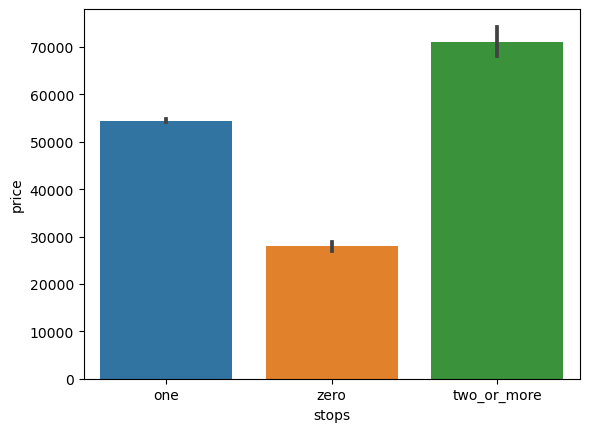

In [15]:
## price as the airline function
sns.barplot(x='stops', y='price', data=df_test)

<Axes: xlabel='stops', ylabel='price'>

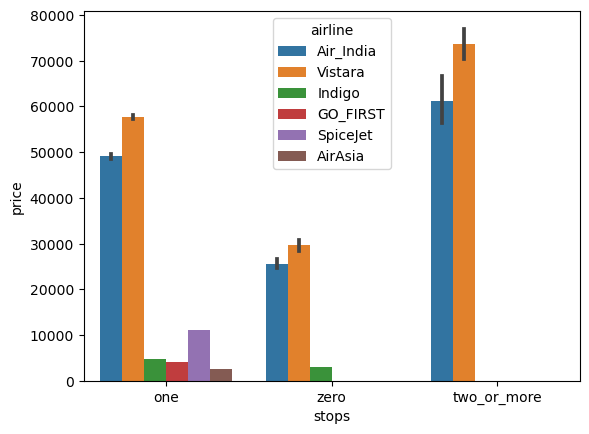

In [16]:
sns.barplot(x='stops', y='price', hue='airline', data=df_test)

<Axes: xlabel='airline', ylabel='price'>

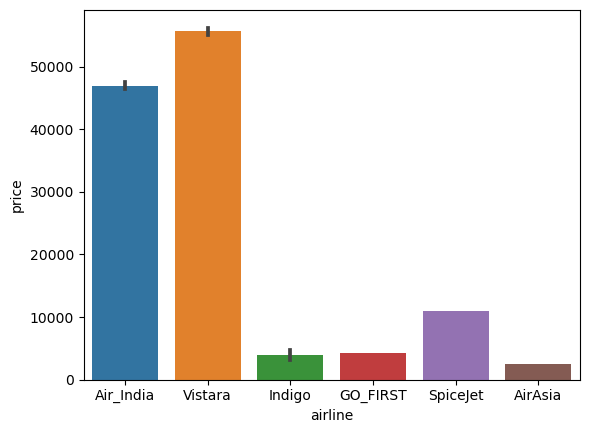

In [17]:
## price as the airline function
sns.barplot(x='airline', y='price', data=df_test)

In [18]:
df_test['days_left'].max()

49

In [19]:
df_test['days_left'].min()

1

In [20]:

bins = [0, 10, 20, 30, 40, 50] 

labels = ['0-10', '11-20', '21-30', '31-40', '41-50']

df_test['days_left_category'] = pd.cut(df_test['days_left'], bins=bins, labels=labels, right=False)

print(df_test)

      filghtId    airline  flight source_city departure_time stops  \
0       278519  Air_India  AI-559   Hyderabad  Early_Morning   one   
1       264230    Vistara  UK-720     Kolkata  Early_Morning   one   
2       260097    Vistara  UK-852   Bangalore        Morning   one   
3       218935    Vistara  UK-747       Delhi  Early_Morning  zero   
4       211085  Air_India  AI-762       Delhi          Night   one   
...        ...        ...     ...         ...            ...   ...   
3342    292592  Air_India  AI-539     Chennai        Evening   one   
3343    212549    Vistara  UK-975       Delhi  Early_Morning   one   
3344    209507    Vistara  UK-747       Delhi  Early_Morning   one   
3345    260162    Vistara  UK-802   Bangalore        Evening   one   
3346    258268    Vistara  UK-810   Bangalore  Early_Morning   one   

     arrival_time destination_city  duration  days_left  price  \
0           Night           Mumbai     14.75         22  45883   
1         Evening          

<Axes: xlabel='days_left_category', ylabel='price'>

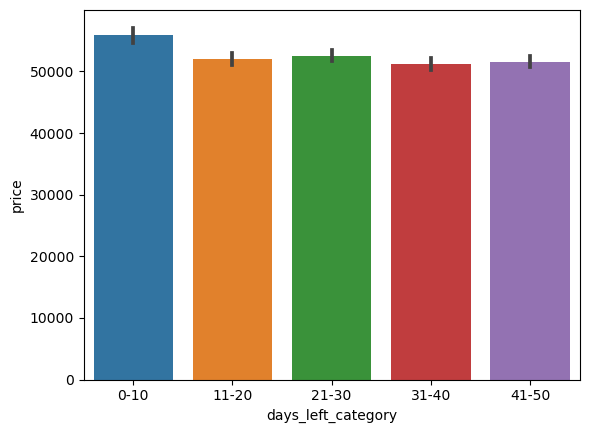

In [21]:
## price as the airline function
sns.barplot(x='days_left_category', y='price', data=df_test)

In [22]:
df_test['duration'].max()

36.17

In [23]:
df_test['duration'].min()

1.25

In [24]:
# Define the bins for categorizing 'days_left'
bins = [0, 10, 20, 30, 40]  # Define the bin edges

# Define the labels for the categories
labels = ['0-10', '11-20', '21-30', '31-40']

# Use pd.cut() to create the categorical variable
df_test['duration_category'] = pd.cut(df_test['duration'], bins=bins, labels=labels, right=False)

print(df_test)

      filghtId    airline  flight source_city departure_time stops  \
0       278519  Air_India  AI-559   Hyderabad  Early_Morning   one   
1       264230    Vistara  UK-720     Kolkata  Early_Morning   one   
2       260097    Vistara  UK-852   Bangalore        Morning   one   
3       218935    Vistara  UK-747       Delhi  Early_Morning  zero   
4       211085  Air_India  AI-762       Delhi          Night   one   
...        ...        ...     ...         ...            ...   ...   
3342    292592  Air_India  AI-539     Chennai        Evening   one   
3343    212549    Vistara  UK-975       Delhi  Early_Morning   one   
3344    209507    Vistara  UK-747       Delhi  Early_Morning   one   
3345    260162    Vistara  UK-802   Bangalore        Evening   one   
3346    258268    Vistara  UK-810   Bangalore  Early_Morning   one   

     arrival_time destination_city  duration  days_left  price  \
0           Night           Mumbai     14.75         22  45883   
1         Evening          

<Axes: xlabel='duration_category', ylabel='price'>

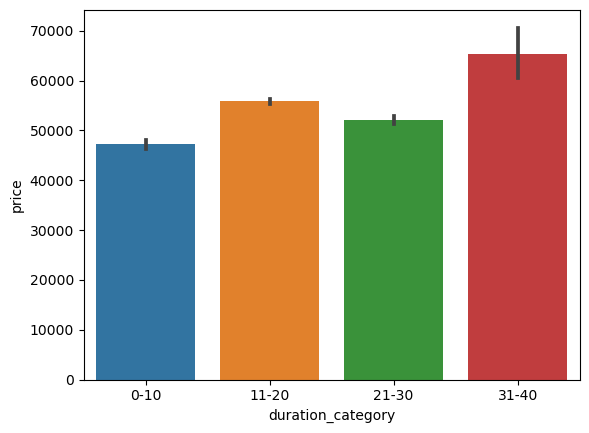

In [25]:
## price as the airline function
sns.barplot(x='duration_category', y='price', data=df_test)

### Analysis  conclusion [The higher contribution on the flight price is the airline types as well as the bigger number of stops, which is related to the duration of the trip and the destination as well]

## Two feature were used in artificial neurone network the airline as number of stopes as first stage

In [26]:
## new data frame based on the two feature will be created 
df_airlines_stops = X_train.drop(['filghtId','flight','source_city','departure_time','arrival_time','destination_city','duration','days_left'], axis = 1)
df_airlines_stops.head(5)

,airline,stops
0,Vistara,one
1,Vistara,one
2,Vistara,one
3,Vistara,one
4,Vistara,one


In [27]:
df_airlines_stops['stops']=df_airlines_stops['stops'].map({'zero':0,'one':1,'two_or_more':2})
df_airlines_stops['airline']=df_airlines_stops['airline'].map({'Air_India':0,'Vistara':1,'Indigo':2,'GO_FIRST':3,'SpiceJet':4,'AirAsia':5})
df_airlines_stops.head(5)

,airline,stops
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [28]:
## Normalized the datafram by using scalling function
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(df_airlines_stops)

In [29]:
x_scaler.shape

(5698, 2)

In [30]:
y = Y_train.drop('filghtId',axis = 1)

In [31]:
y_scaler = scaler.fit_transform(y)

In [32]:
y_scaler

array([[0.58194454],
       [0.43536462],
       [0.51835293],
       ...,
       [0.42931946],
       [0.42940644],
       [0.50595818]])

In [33]:
y_scaler.shape

(5698, 1)

In [34]:
##spliting the data for test and traning data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_airlines_stops,y)

In [35]:
##Bulding the artifitial neurons network

##imprtant the required library
import tensorflow.keras ##keras based on tensorflow API
from keras.models import Sequential ## bulid the model in sequential form
from keras.layers import Dense ## for fully conecting the output to the next hadin layer

##Bulding the model
model = Sequential() ## Bulding the model
model.add(Dense(250, input_dim = 2, activation = 'relu'))## need to defind the fully conected layer+how many neurons network+how many input+activation fucntion type
model.add(Dense(250, activation = 'relu'))## additional hiden layer of neurons
model.add(Dense(1, activation = 'linear'))## output ##linear was used as activation for help us to find the prediction

In [36]:
## Train the model
model.compile(optimizer='adam', loss='mean_squared_error')## the obected is the mean sequared error determination
EH = model.fit(x_train,y_train, epochs=100, batch_size = 50, verbose = 1, validation_split= 0.2)##use the modle based on the mean squared error and fit the x_train and y_train with spesific parameter// validation split was used to avoid over fitting

Epoch 1/100
69/69 [==============================] - 0s 3ms/step - loss: 2868357376.0000 - val_loss: 2899838976.0000
Epoch 2/100
69/69 [==============================] - 0s 1ms/step - loss: 2841982464.0000 - val_loss: 2839932928.0000
Epoch 3/100
69/69 [==============================] - 0s 1ms/step - loss: 2726711040.0000 - val_loss: 2651440640.0000
Epoch 4/100
69/69 [==============================] - 0s 1ms/step - loss: 2456504832.0000 - val_loss: 2283084800.0000
Epoch 5/100
69/69 [==============================] - 0s 1ms/step - loss: 2008956160.0000 - val_loss: 1747535360.0000
Epoch 6/100
69/69 [==============================] - 0s 1ms/step - loss: 1438569216.0000 - val_loss: 1144553600.0000
Epoch 7/100
69/69 [==============================] - 0s 1ms/step - loss: 874871936.0000 - val_loss: 627298176.0000
Epoch 8/100
69/69 [==============================] - 0s 1ms/step - loss: 461798432.0000 - val_loss: 310223808.0000
Epoch 9/100
69/69 [==============================] - 0s 1ms/step - l

Epoch 72/100
69/69 [==============================] - 0s 1ms/step - loss: 113904600.0000 - val_loss: 98977648.0000
Epoch 73/100
69/69 [==============================] - 0s 1ms/step - loss: 114068680.0000 - val_loss: 98857992.0000
Epoch 74/100
69/69 [==============================] - 0s 1ms/step - loss: 114038696.0000 - val_loss: 98943600.0000
Epoch 75/100
69/69 [==============================] - 0s 1ms/step - loss: 114021224.0000 - val_loss: 98878088.0000
Epoch 76/100
69/69 [==============================] - 0s 1ms/step - loss: 114077200.0000 - val_loss: 98830960.0000
Epoch 77/100
69/69 [==============================] - 0s 1ms/step - loss: 114157392.0000 - val_loss: 98960024.0000
Epoch 78/100
69/69 [==============================] - 0s 1ms/step - loss: 113900232.0000 - val_loss: 98947184.0000
Epoch 79/100
69/69 [==============================] - 0s 1ms/step - loss: 113925784.0000 - val_loss: 99005768.0000
Epoch 80/100
69/69 [==============================] - 0s 1ms/step - loss: 113762

Text(0, 0.5, 'validation and loss value')

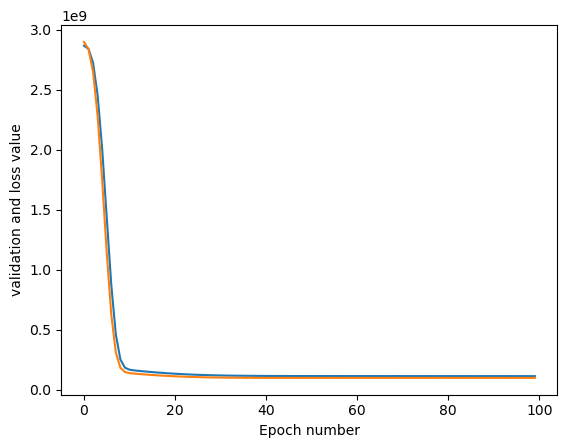

In [37]:
plt.plot(EH.history['loss'])
plt.plot(EH.history['val_loss'])
plt.xlabel('Epoch number')
plt.ylabel('validation and loss value')

In [55]:
# airline ,stops
data_test = np.array([[1,3]])
y_predict= model.predict(data_test)
y_predict.shape
print(y_predict)

1/1 [==============================] - 0s 13ms/step
[[104356.2]]


In [56]:
# airline ,stops
data_test = np.array([[1,2]])
y_predict= model.predict(data_test)
y_predict.shape
print(y_predict)

1/1 [==============================] - 0s 15ms/step
[[80028.08]]


In [57]:
# airline ,stops
data_test = np.array([[1,1]])
y_predict= model.predict(data_test)
y_predict.shape
print(y_predict)

1/1 [==============================] - 0s 14ms/step
[[55699.94]]


## The model has a high value of loss that leads to the need to more feature engineering such as normalization

## Interestingly the predicted price has increased with higher number of stops which is reasonable according to our analysis

## However, the airline types have not good results, which conclude the model needs to improve more